# Machine Learning: An Outlook

This chapter gives a very brief look into the vast topic of **machine learning** and how to build machine learning models with Python.



## Principles of ML

### Machine Learning Algorithms and Models


In the most general definition, a **machine learning algorithm** is any algorithm that improves its performance with experience. That is, if we give data to the algorithm, build a better **model** of the data that enables tasks such as **prediction**: Given a new item with its attributes, predict the value of the target variable according to the examples seen. This ability makes machine learning the driving technology behind **predictive analytics**.

### Classification and Regression

Machine learning is often apply to predict the value of a target variable of interest. We speak of **classification** if the model outputs a _categorical_ variable, i.e. assigns labels to data points that divide them into groups. The machine learning algorithm often performs this task by creating and optimizing a **decision boundary** in the feature space that separates classes. We speak of **regression** if the target variable is a _continuous_ value. This is the task of [📓fitting](../stats/stats-fitting-short.ipynb) a function to the data points so that it enables prediction.


![](https://upload.wikimedia.org/wikipedia/commons/1/13/Main-qimg-48d5bd214e53d440fa32fc9e5300c894.png)
**classification**
_Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Main-qimg-48d5bd214e53d440fa32fc9e5300c894.png)_

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/500px-Linear_regression.svg.png) **regression** _Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Linear_regression.svg)

### Supervised Learning

**Supervised learning** is machine learning from labelled examples: During the **training** of the model, we show the ML algorithm examples labelled with a known value for our target variable. With every example, the algorithm learns and optimizes its model internally.

### Unsupervised Learning

**Unsupervised learning** is machine learning withouth labelled examples: Rather than training a model with known values of the target variable, we ask the ML algorithm to _assign labels_ to the data points by _discovering the structure_ of the dataset. For example, **clustering** algorithms try to discover dense areas of data points that are close to each other in the feature space.

## ML with scikit-learn

The [**scikit-learn**](http://scikit-learn.org/stable/) package provides state-of-the art tools for classical machine learning.

![sklearncheat](graphics/third-party/sklearn-cheatsheet.png) **scikit-learn cheat sheet** *Source: [scikit-learn developers](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)*

The following code example shows a demonstration of various classifiers on a test dataset, including a visualization of their output and how they separate the classes of points in the feature space.

/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cls/miniforge3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


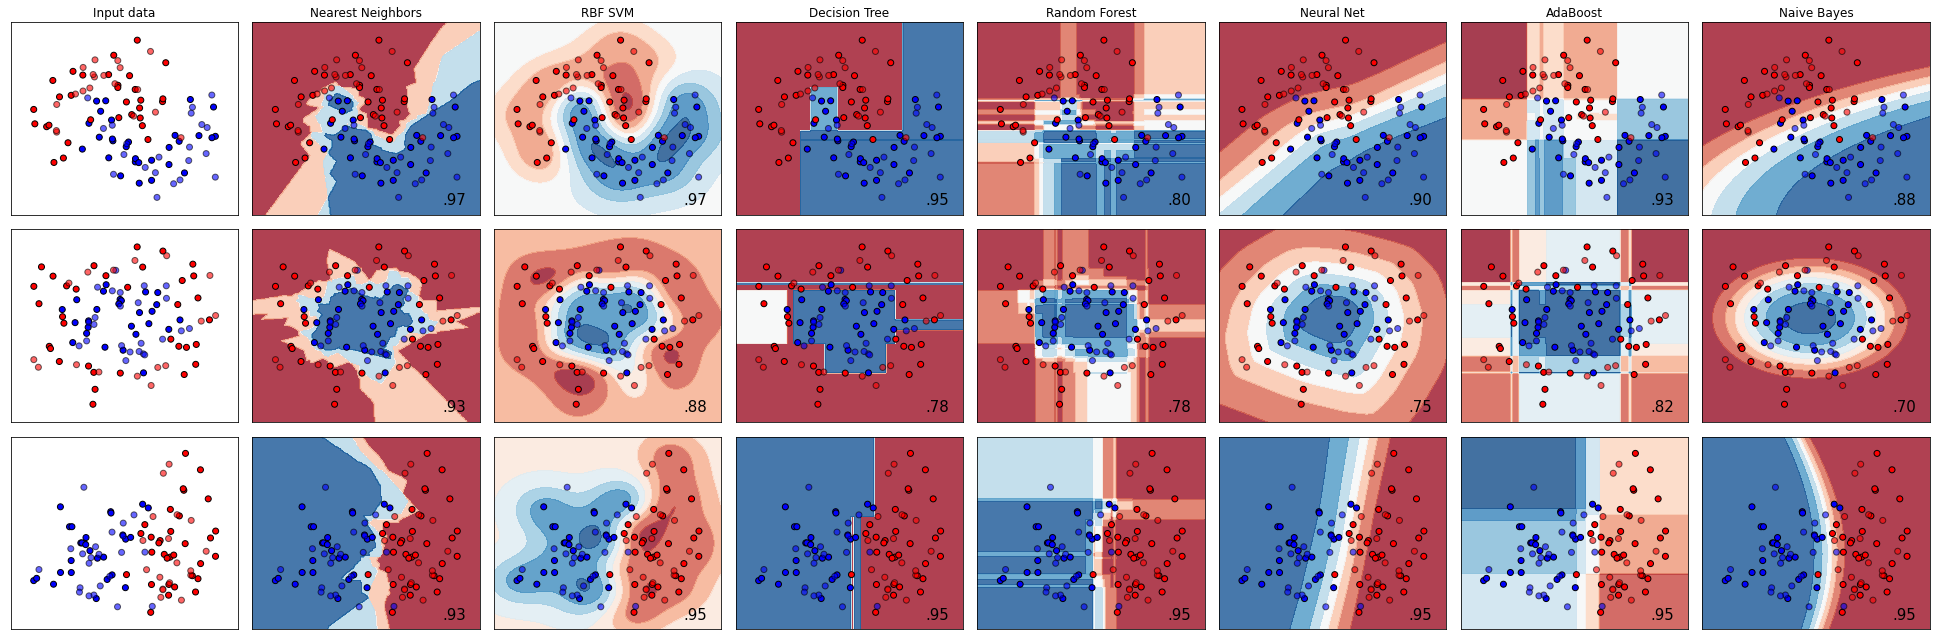

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

**Machine learning with scikit-learn is the focus of the course [📓 Machine Learning with Python](../index/mlp2-machine-learning-python-2day.ipynb)**

Also, the following additional material gives examples of ML workflows using scikit-learn:

[📓 advanced course material: Machine Learning Compendium](../ml/ml-compendium.ipynb)

[📓 advanced course material: Marbles - A Supervised Machine Learning Workflow](../ml/ml-workflow-marbles-part-1.ipynb)

[📓 advanced course material: Marbles - An Unsupervised Machine Learning Workflow](../ml/ml-marbles-unsupervised-learning.ipynb)

## ML with PySpark

In cases where the training data set is so large that it needs to be processed with [📓distributed computing](../python/python-big-data.ipynb), we can apply the machine learning tools that come with **Spark**. While support for ML in Spark is not yet as extensive and user-friendly as `sklearn`, **pyspark.mllib** and **pyspark.ml** have many of the building blocks for ML pipelines working in a similar way.

**Machine learning using PySpark is the focus of the course [📓 Machine Learning with PySpark](../index/mls2-pyspark-machine-learning-2day.ipynb)**

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2026 [Point 8 GmbH](https://point-8.de)_

